# Import Libraries

In [1]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Data

Fetch data for 5 years for train dataset

In [2]:
start = dt.datetime(2013,1,1)
end = dt.datetime(2018,12,31)
stk_data = gh(symbol='SBIN',start=start,end=end)

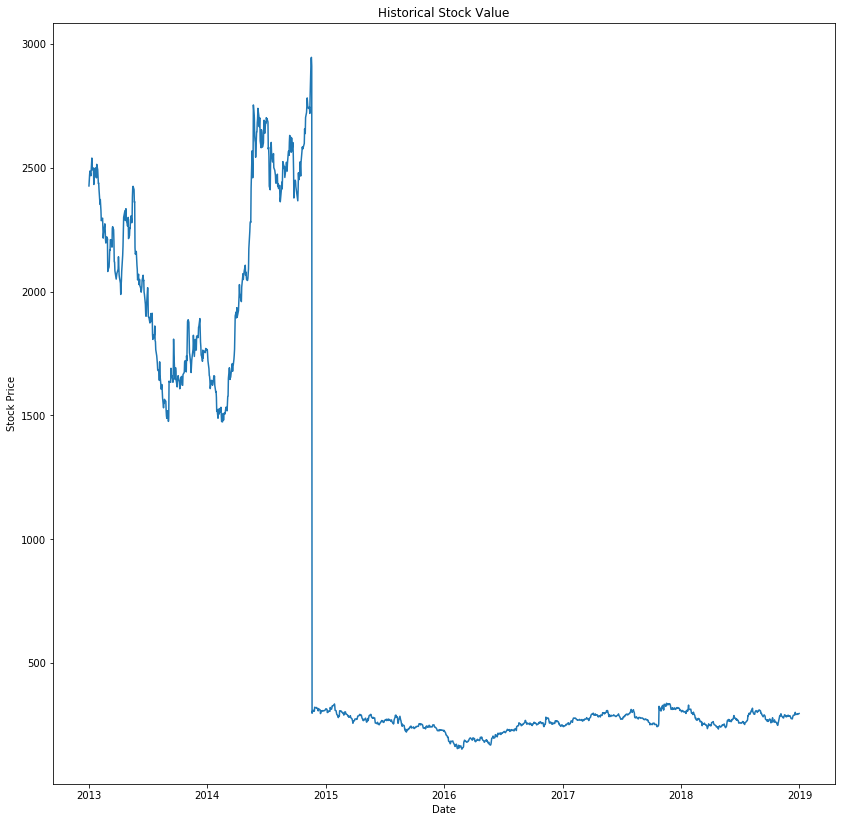

In [3]:
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [4]:
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']

## Preprocessing

In [5]:
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1482):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# LSTM & GRU

### LSTM

In [6]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1,activation="relu"))


### GRU

In [7]:
from keras.layers import Dense, GRU
regressor = Sequential()
regressor.add(GRU(2, input_shape=(X_train.shape[1], 1)))
regressor.add(Dense(1, activation="relu"))
regressor.compile(optimizer="adam", loss="mean_squared_error", metrics=["acc"])
regressor.fit(X_train, y_train, epochs=30,batch_size = 32)


Epoch 1/30
45/45 [==============================] - 2s 13ms/step - loss: 0.1327 - acc: 0.0011
Epoch 2/30
45/45 [==============================] - 1s 12ms/step - loss: 0.0871 - acc: 6.6452e-04
Epoch 3/30
45/45 [==============================] - 1s 12ms/step - loss: 0.0500 - acc: 7.9224e-04
Epoch 4/30
45/45 [==============================] - 1s 12ms/step - loss: 0.0267 - acc: 1.6520e-04
Epoch 5/30
45/45 [==============================] - 1s 12ms/step - loss: 0.0140 - acc: 5.5247e-04
Epoch 6/30
45/45 [==============================] - 1s 13ms/step - loss: 0.0065 - acc: 6.4067e-04
Epoch 7/30
45/45 [==============================] - 1s 12ms/step - loss: 0.0042 - acc: 0.0014
Epoch 8/30
45/45 [==============================] - 1s 13ms/step - loss: 0.0024 - acc: 0.0011
Epoch 9/30
45/45 [==============================] - 1s 12ms/step - loss: 0.0014 - acc: 2.4950e-04
Epoch 10/30
45/45 [==============================] - 1s 12ms/step - loss: 0.0021 - acc: 0.0019
Epoch 11/30
45/45 [================

In [8]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])
regressor.fit(X_train, y_train, epochs = 30, batch_size = 32)

Epoch 1/30
45/45 [==============================] - 2s 13ms/step - loss: 0.0013 - accuracy: 0.0017
Epoch 2/30
45/45 [==============================] - 1s 12ms/step - loss: 6.1612e-04 - accuracy: 0.0023
Epoch 3/30
45/45 [==============================] - 0s 11ms/step - loss: 9.5937e-04 - accuracy: 0.0031
Epoch 4/30
45/45 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 0.0017
Epoch 5/30
45/45 [==============================] - 1s 11ms/step - loss: 0.0010 - accuracy: 3.7165e-04
Epoch 6/30
45/45 [==============================] - 1s 13ms/step - loss: 9.4312e-04 - accuracy: 0.0021
Epoch 7/30
45/45 [==============================] - 1s 12ms/step - loss: 0.0012 - accuracy: 0.0017
Epoch 8/30
45/45 [==============================] - 1s 11ms/step - loss: 7.7019e-04 - accuracy: 0.0013
Epoch 9/30
45/45 [==============================] - 1s 11ms/step - loss: 0.0026 - accuracy: 0.0024
Epoch 10/30
45/45 [==============================] - 1s 12ms/step - loss: 6.5951e-04 - ac

# Test data

Fetch data for 9 months for test dataset

In [9]:
testdataframe= gh(symbol='SBIN',start=dt.datetime(2019,1,1),end=dt.datetime(2019,9,18))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:175, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 235):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


### Inverse transform of predicted data from scaled to original

In [10]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Predicted Data

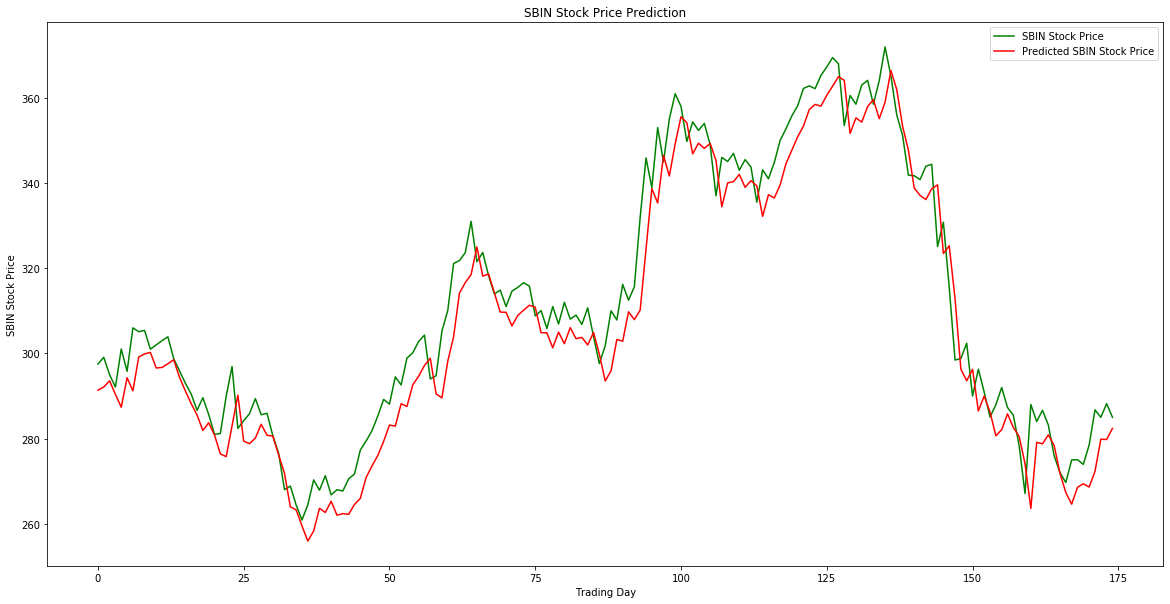

In [11]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'SBIN Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBIN Stock Price')
plt.title('SBIN Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBIN Stock Price')
plt.legend()
plt.show()

# RMSE

In [12]:
rmse=np.sqrt(np.mean(((predicted_stock_price- real_stock_price)**2)))
rmse


7.875339032076879